In [68]:
from CheckSteepestDescent_partial import *
from CheckMediumScale_init import *

In [69]:
P, q, r = quadratic_problem2d(np.array([2, 1]))

cost = get_cost(P, q, r)
gradient = get_gradient(P, q)
hessian = get_hessian(P)

In [90]:
def newton(x0,cost,gradient, hessian, epsilon=1e-2, maxiter=100000):
    xlist = [x0] # list of points
    flist = [cost(x0)] # list of cost function  values
    nlist = [np.linalg.norm(gradient(x0))] # list of gradient norm values
    it = 0

    x = xlist[-1]
    grad = gradient(x)
   
    xk = x - np.linalg.inv(hessian(x)).dot(grad)
    xlist.append(xk)
    flist.append(cost(xk))
    nlist.append(np.linalg.norm(gradient(xk)))
    while np.abs(flist[-2] - flist[-1]) > epsilon:
        x = xlist[-1]
        grad = gradient(x)
        xk = x - np.linalg.inv(hessian(x)).dot(grad)
        xlist.append(xk)
        flist.append(cost(xk))
        nlist.append(np.linalg.norm(gradient(xk)))
        it += 1
        if it > maxiter:
            break
    return xlist,flist,nlist


# Probleme quadratique

In [87]:
def visualize_newton(cost, gradient, hessian, xstar, x0=None,  epsilon=1e-4, maxiter=100000):
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        if x0 is None:
            x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
        fig = plt.figure(1, figsize=(19,5))
        xlist,flist,nlist =  newton(x0,cost,gradient, hessian, epsilon, maxiter)
        xlist = np.asarray(xlist)
        #
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
        #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$\nabla f(x^k)$')
        
        
    # 
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()



xstar = np.linalg.solve(P, -q) 

In [80]:
visualize_newton(cost, gradient, hessian, xstar, x0=x0)

ValueError: operands could not be broadcast together with shapes (500,) (500,2) 

<Figure size 1900x500 with 0 Axes>

# Fonction mediateur

In [75]:
alpha = lambda x  : x@np.array([1, 3]) - .1
beta = lambda x : x@np.array([1, -3]) - .1
gamma = lambda x: -x@np.array([-1, 0]) - .1

cost = lambda x : np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x))

gradient = lambda x : np.array([np.exp(alpha(x)) + np.exp(beta(x)) - np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))])

hessian = lambda x : np.array(
    [[np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))], 
     [3*np.exp(alpha(x)) - 3*np.exp(beta(x)),                9*np.exp(alpha(x)) + 9*np.exp(beta(x))]]
     )

xstar = np.array([-np.log(2)/2 , 0])

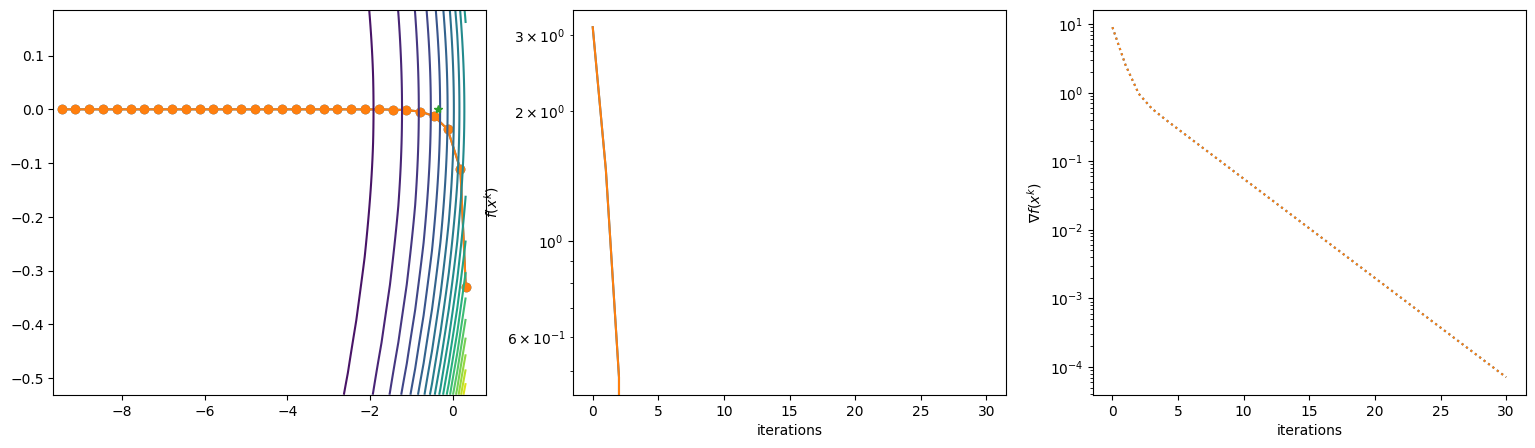

In [76]:
visualize_newton(cost, gradient, hessian, xstar)


# Log Barriere

In [91]:
# 1. generation of A,b et c
m = 500
n = 2
scale = 0.2
x0 = np.ones(n)
A, b, c = create_problem(m, n, scale, x0)



def get_cost(A, b, c):
    
    def cost(x):
        print(x.shape)
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        cout = np.dot(c, x) - np.sum(np.log(b - np.dot(A.T, x)))
        return cout
    return cost



def get_gradient(A, b, c):
    def gradient(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        grad = c + np.dot(A, 1/(b - np.dot(A.T, x)))
        return grad
    return gradient


def get_hessian(A, b, c):
    def hessian(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        hess = A @ np.diag(1/(b - np.dot(A.T, x))) @ A.T
        return hess

    def hessian(x):
        
    return hessian

cost = get_cost(A, b, c)
gradient = get_gradient(A, b, c)
hessian = get_hessian(A, b, c)     


In [89]:
visualize_newton(cost, gradient, hessian, xstar, x0=x0)

(2,)
(2,)
(2,)


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

<Figure size 1900x500 with 0 Axes>